In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")
import os.path

In [2]:
raw_df = pd.read_csv('bc_rest_open.csv')

In [3]:
raw_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
1,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
2,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,103- 9386 120 Street,Surrey,BC,V3V 4B9,49.173723,-122.889641,4.0,9,1,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,OfA_4cHgvlknHMcn0qNs2w,Little Caesars,7010 Kerr Street,Vancouver,BC,V5S,49.219532,-123.040893,1.0,9,1,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Restaurants, Pizza","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
4,r-hWf-bd9im5rj_l2MeofQ,Take Five Café,102-609 Granville Street,Vancouver,BC,V7Y 1H4,49.283532,-123.117107,4.0,17,1,"{'BikeParking': 'True', 'WiFi': ""'free'"", 'Res...","Food, Coffee & Tea, Restaurants, Cafes",NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   4730 non-null   object 
 1   name          4730 non-null   object 
 2   address       4713 non-null   object 
 3   city          4730 non-null   object 
 4   state         4730 non-null   object 
 5   postal_code   4722 non-null   object 
 6   latitude      4730 non-null   float64
 7   longitude     4730 non-null   float64
 8   stars         4730 non-null   float64
 9   review_count  4730 non-null   int64  
 10  is_open       4730 non-null   int64  
 11  attributes    4631 non-null   object 
 12  categories    4730 non-null   object 
 13  hours         4143 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 517.5+ KB


In [12]:
raw_df['city'] = raw_df.city.str.title()
raw_df['name'] = raw_df.name.str.lower()
raw_df['categories'] = raw_df.categories.str.lower()

In [13]:
raw_df.isnull().sum()

business_id       0
name              0
address          17
city              0
state             0
postal_code       8
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes       99
categories        0
hours           587
dtype: int64

In [8]:
cleaned_cols = ['stars', 'business_id', 'name',
               'city', 'state', 'postal_code', 'latitude', 'longitude',
               'categories', 'review_count']

In [9]:
business_df = raw_df[cleaned_cols]

In [10]:
business_df.head()

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count
0,3.5,D4JtQNTI4X3KcbzacDJsMw,bob likes thai food,Vancouver,BC,V5V,49.251342,-123.101333,"restaurants, thai",169
1,4.0,QciD6FbNklaJvUbLExD4Nw,argo,Burnaby,BC,V5G 1G4,49.254436,-123.020050,"food delivery services, food, restaurants, med...",76
2,4.0,Xi2GGNzOiUS8r6WCFvu-fw,kerala kitchen,Surrey,BC,V3V 4B9,49.173723,-122.889641,"indian, restaurants",9
3,1.0,OfA_4cHgvlknHMcn0qNs2w,little caesars,Vancouver,BC,V5S,49.219532,-123.040893,"restaurants, pizza",9
4,4.0,r-hWf-bd9im5rj_l2MeofQ,take five café,Vancouver,BC,V7Y 1H4,49.283532,-123.117107,"food, coffee & tea, restaurants, cafes",17


In [11]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stars         4730 non-null   float64
 1   business_id   4730 non-null   object 
 2   name          4730 non-null   object 
 3   city          4730 non-null   object 
 4   state         4730 non-null   object 
 5   postal_code   4722 non-null   object 
 6   latitude      4730 non-null   float64
 7   longitude     4730 non-null   float64
 8   categories    4730 non-null   object 
 9   review_count  4730 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 369.7+ KB


In [14]:
business_df = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')

In [15]:
sort_business_df = business_df.groupby('categories').count().sort_values(by='business_id',ascending=False).reset_index()


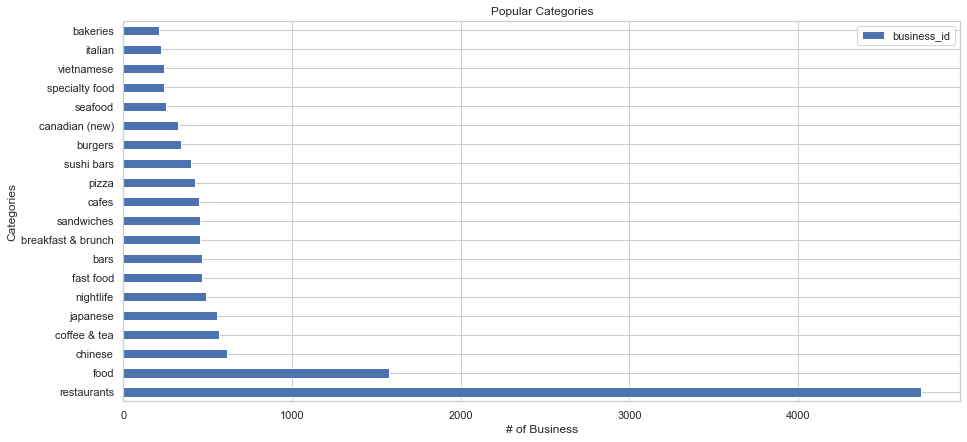

In [16]:
sort_business_df.head(20).plot(kind = 'barh', x = 'categories', y = 'business_id', figsize=(15,7))
plt.title('Popular Categories')
plt.xlabel('# of Business')
plt.ylabel('Categories')
plt.show()

In [27]:
# Categories with count more than 100

categories_df = pd.read_csv('cat_list.csv',encoding='utf-8',error_bad_lines=False )

<ipython-input-27-74964a312800>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  categories_df = pd.read_csv('cat_list.csv',encoding='utf-8',error_bad_lines=False )


In [28]:
business_df=business_df[business_df.categories.isin(categories_df.categories)]

In [29]:
business_df.categories.unique()

array(['restaurants', 'food delivery services', 'food', 'mediterranean',
       'pizza', 'indian', 'coffee & tea', 'cafes', 'chinese',
       'canadian (new)', 'bars', 'nightlife', 'sushi bars', 'sandwiches',
       'american (traditional)', 'noodles', 'mexican', 'specialty food',
       'burgers', 'fast food', 'italian', 'japanese', 'asian fusion',
       'vietnamese', 'bakeries', 'middle eastern', 'chicken wings',
       'salad', 'breakfast & brunch', 'seafood', 'american (new)',
       'vegetarian', 'pubs', 'delis', 'dim sum', 'taiwanese', 'desserts',
       'barbeque', 'korean'], dtype=object)

In [30]:
business_df.to_csv('business_list.csv', index=False, header=True)